In [46]:
# Importing the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('Elon_musk.csv', encoding = 'Latin')
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## Data cleaning and processing

In [48]:
df1 = df.drop('Unnamed: 0', axis = 1)
df1.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [49]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [50]:
extra_stopwords=['haha',"c", "e", "ab", "fe","sn", "h", "v", "af", "mi", "w","mu","c","la", "un", "b", "yeah", "rt", "x","g","u", "f"]

In [51]:
# Using TweetTokenizer for removing Twitter username handles from a given twitter text

from nltk.tokenize import TweetTokenizer
token = TweetTokenizer(strip_handles = True)

In [52]:
df2=[]
for i in range (0, len(df1)):
    data= token.tokenize(df1["Text"][i])
    data= " ".join(data)
    df2.append(data)

In [53]:
df3=pd.DataFrame(df2)
df3.columns= ["text"]
df3.head()

,text
0,I  m an alien
1,Ray tracing on Cyberpunk with HDR is next-leve...
2,Great interview !
3,Doge is underestimated
4,Congratulations Tesla China for amazing execut...


In [54]:
lemmatizer = WordNetLemmatizer()

In [64]:
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in range(0, len(df3)):
    cleaned= re.sub('[^a-zA-Z]', " ", df3["text"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = [word for word in cleaned if word not in extra_stopwords]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

In [65]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost

corp = pd.DataFrame({"text": corpus})
corp.to_csv("cleaned.csv")

In [66]:
# for checking the extent to which the data has been cleaned & comparing cleaned and uncleaned data

df4=pd.read_csv("cleaned.csv")
df4.head(30)

,Unnamed: 0,text
0,0,alien
1,1,ray tracing cyberpunk hdr next level tried
2,2,great interview
3,3,doge underestimated
4,4,congratulation tesla china amazing execution l...
5,5,happy new year ox http co wfkmyu oj
6,6,frodo underdoge thought would fail http co zgx...
7,7,thanks
8,8,indeed tweet definitely represent real world t...
9,9,entertaining outcome likely


In [67]:
df4.drop('Unnamed: 0', axis = 1, inplace = True)

In [68]:
df4.columns = ['cleaned_text']
df4.head()

,cleaned_text
0,alien
1,ray tracing cyberpunk hdr next level tried
2,great interview
3,doge underestimated
4,congratulation tesla china amazing execution l...


In [69]:
pd.concat([df1, df4], axis = 1).head()

,Text,cleaned_text
0,@kunalb11 Im an alien,alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing cyberpunk hdr next level tried
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...


In [70]:
# removing empty rows
data =[]
for i in range(0, len(corpus)):
    if corpus[i]!="":
        data.append(corpus[i])

In [71]:
data

['alien',
 'ray tracing cyberpunk hdr next level tried',
 'great interview',
 'doge underestimated',
 'congratulation tesla china amazing execution last year next even',
 'happy new year ox http co wfkmyu oj',
 'frodo underdoge thought would fail http co zgxjfdzzrm',
 'thanks',
 'indeed tweet definitely represent real world time allocation',
 'entertaining outcome likely',
 'sent',
 'agree clubhouse',
 'http co rwe uhsts',
 'getting real',
 'bought dogecoin lil toddler hodler',
 'definitely issue sentencing seems bit high',
 'thanks fixing',
 'please unlock account',
 'true power http co fc uhqsd',
 'crypto wallet give private key avoided cost',
 'app suck',
 'nasa selected falcon heavy launch first two element lunar gateway together one mission http co pwt',
 'yes',
 'predict cash flow reasonably well starlink ipo',
 'starlink staggeringly difficult technical economic endeavor however http co z ac skqx',
 'spacex need pas deep chasm negative cash flow next year http co j hdjl',
 'lowe

In [73]:
len(corpus)

1999

In [74]:
len(data)

1882

In [75]:
joined_data= " ".join(data)
print(joined_data)

alien ray tracing cyberpunk hdr next level tried great interview doge underestimated congratulation tesla china amazing execution last year next even happy new year ox http co wfkmyu oj frodo underdoge thought would fail http co zgxjfdzzrm thanks indeed tweet definitely represent real world time allocation entertaining outcome likely sent agree clubhouse http co rwe uhsts getting real bought dogecoin lil toddler hodler definitely issue sentencing seems bit high thanks fixing please unlock account true power http co fc uhqsd crypto wallet give private key avoided cost app suck nasa selected falcon heavy launch first two element lunar gateway together one mission http co pwt yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however http co z ac skqx spacex need pas deep chasm negative cash flow next year http co j hdjl lowest cost per ton carbon sequestered net value product made must scalable http co xmyi qwsgw meant price cou

## Applying bag of Words without N grams

In [76]:
# importing Pakages

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
bow= cv.fit_transform(data).toarray()
print(cv.vocabulary_)

{'alien': 110, 'ray': 2953, 'tracing': 3733, 'cyberpunk': 788, 'hdr': 1588, 'next': 2400, 'level': 2053, 'tried': 3753, 'great': 1517, 'interview': 1843, 'doge': 937, 'underestimated': 3841, 'congratulation': 677, 'tesla': 3633, 'china': 569, 'amazing': 134, 'execution': 1162, 'last': 2005, 'year': 4217, 'even': 1135, 'happy': 1565, 'new': 2398, 'ox': 2582, 'http': 1688, 'co': 613, 'wfkmyu': 4061, 'oj': 2502, 'frodo': 1370, 'underdoge': 3840, 'thought': 3667, 'would': 4135, 'fail': 1204, 'zgxjfdzzrm': 4267, 'thanks': 3646, 'indeed': 1780, 'tweet': 3788, 'definitely': 833, 'represent': 3034, 'real': 2971, 'world': 4130, 'time': 3682, 'allocation': 113, 'entertaining': 1095, 'outcome': 2557, 'likely': 2073, 'sent': 3226, 'agree': 85, 'clubhouse': 606, 'rwe': 3143, 'uhsts': 3814, 'getting': 1452, 'bought': 406, 'dogecoin': 939, 'lil': 2074, 'toddler': 3699, 'hodler': 1651, 'issue': 1870, 'sentencing': 3227, 'seems': 3214, 'bit': 361, 'high': 1631, 'fixing': 1295, 'please': 2710, 'unlock':

## Applying bag of Words with N grams

In [77]:
cv_ngram=CountVectorizer(analyzer='word',ngram_range=(1,2),max_features=2000)
bow_ngram=cv_ngram.fit_transform(data).toarray()

In [78]:
print(cv_ngram.vocabulary_)

{'alien': 38, 'cyberpunk': 357, 'next': 1123, 'level': 895, 'tried': 1825, 'next level': 1124, 'great': 681, 'interview': 810, 'great interview': 687, 'doge': 427, 'congratulation': 308, 'tesla': 1743, 'china': 249, 'amazing': 52, 'last': 861, 'year': 1980, 'even': 512, 'happy': 712, 'new': 1116, 'http': 765, 'co': 259, 'oj': 1158, 'http co': 766, 'thought': 1777, 'would': 1966, 'fail': 548, 'thought would': 1778, 'thanks': 1767, 'indeed': 790, 'tweet': 1842, 'definitely': 383, 'real': 1406, 'world': 1962, 'time': 1791, 'allocation': 39, 'entertaining': 495, 'outcome': 1183, 'likely': 905, 'entertaining outcome': 496, 'outcome likely': 1184, 'sent': 1532, 'agree': 24, 'clubhouse': 258, 'getting': 648, 'bought': 167, 'dogecoin': 428, 'issue': 816, 'seems': 1521, 'bit': 142, 'high': 741, 'bit high': 143, 'please': 1253, 'true': 1829, 'power': 1270, 'fc': 569, 'power http': 1271, 'crypto': 345, 'give': 654, 'private': 1290, 'key': 827, 'cost': 322, 'suck': 1686, 'nasa': 1094, 'falcon': 55

In [79]:
bow_ngram.shape

(1882, 2000)

In [80]:
# Applying TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2500, ngram_range=(1,3))
tfidf_df=tfidf.fit_transform(data)

In [81]:
print(tfidf.vocabulary_)

{'alien': 40, 'cyberpunk': 391, 'next': 1316, 'level': 981, 'tried': 2312, 'next level': 1317, 'great': 742, 'interview': 885, 'great interview': 750, 'doge': 466, 'congratulation': 338, 'tesla': 2220, 'china': 268, 'amazing': 55, 'last': 943, 'year': 2477, 'even': 559, 'happy': 775, 'new': 1309, 'http': 830, 'co': 278, 'oj': 1353, 'http co': 831, 'thought': 2260, 'would': 2462, 'fail': 596, 'thought would': 2261, 'thanks': 2248, 'indeed': 865, 'tweet': 2329, 'definitely': 419, 'real': 1867, 'world': 2457, 'time': 2276, 'allocation': 41, 'entertaining': 541, 'outcome': 1382, 'likely': 993, 'entertaining outcome': 542, 'outcome likely': 1383, 'entertaining outcome likely': 543, 'sent': 1994, 'agree': 25, 'clubhouse': 277, 'getting': 706, 'bought': 177, 'dogecoin': 467, 'issue': 891, 'seems': 1983, 'bit': 150, 'high': 806, 'bit high': 151, 'please': 1457, 'true': 2316, 'power': 1499, 'fc': 621, 'power http': 1505, 'power http co': 1506, 'crypto': 379, 'give': 713, 'private': 1554, 'key':

## Using world cloud

In [ ]:
# ! pip install wordcloud

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

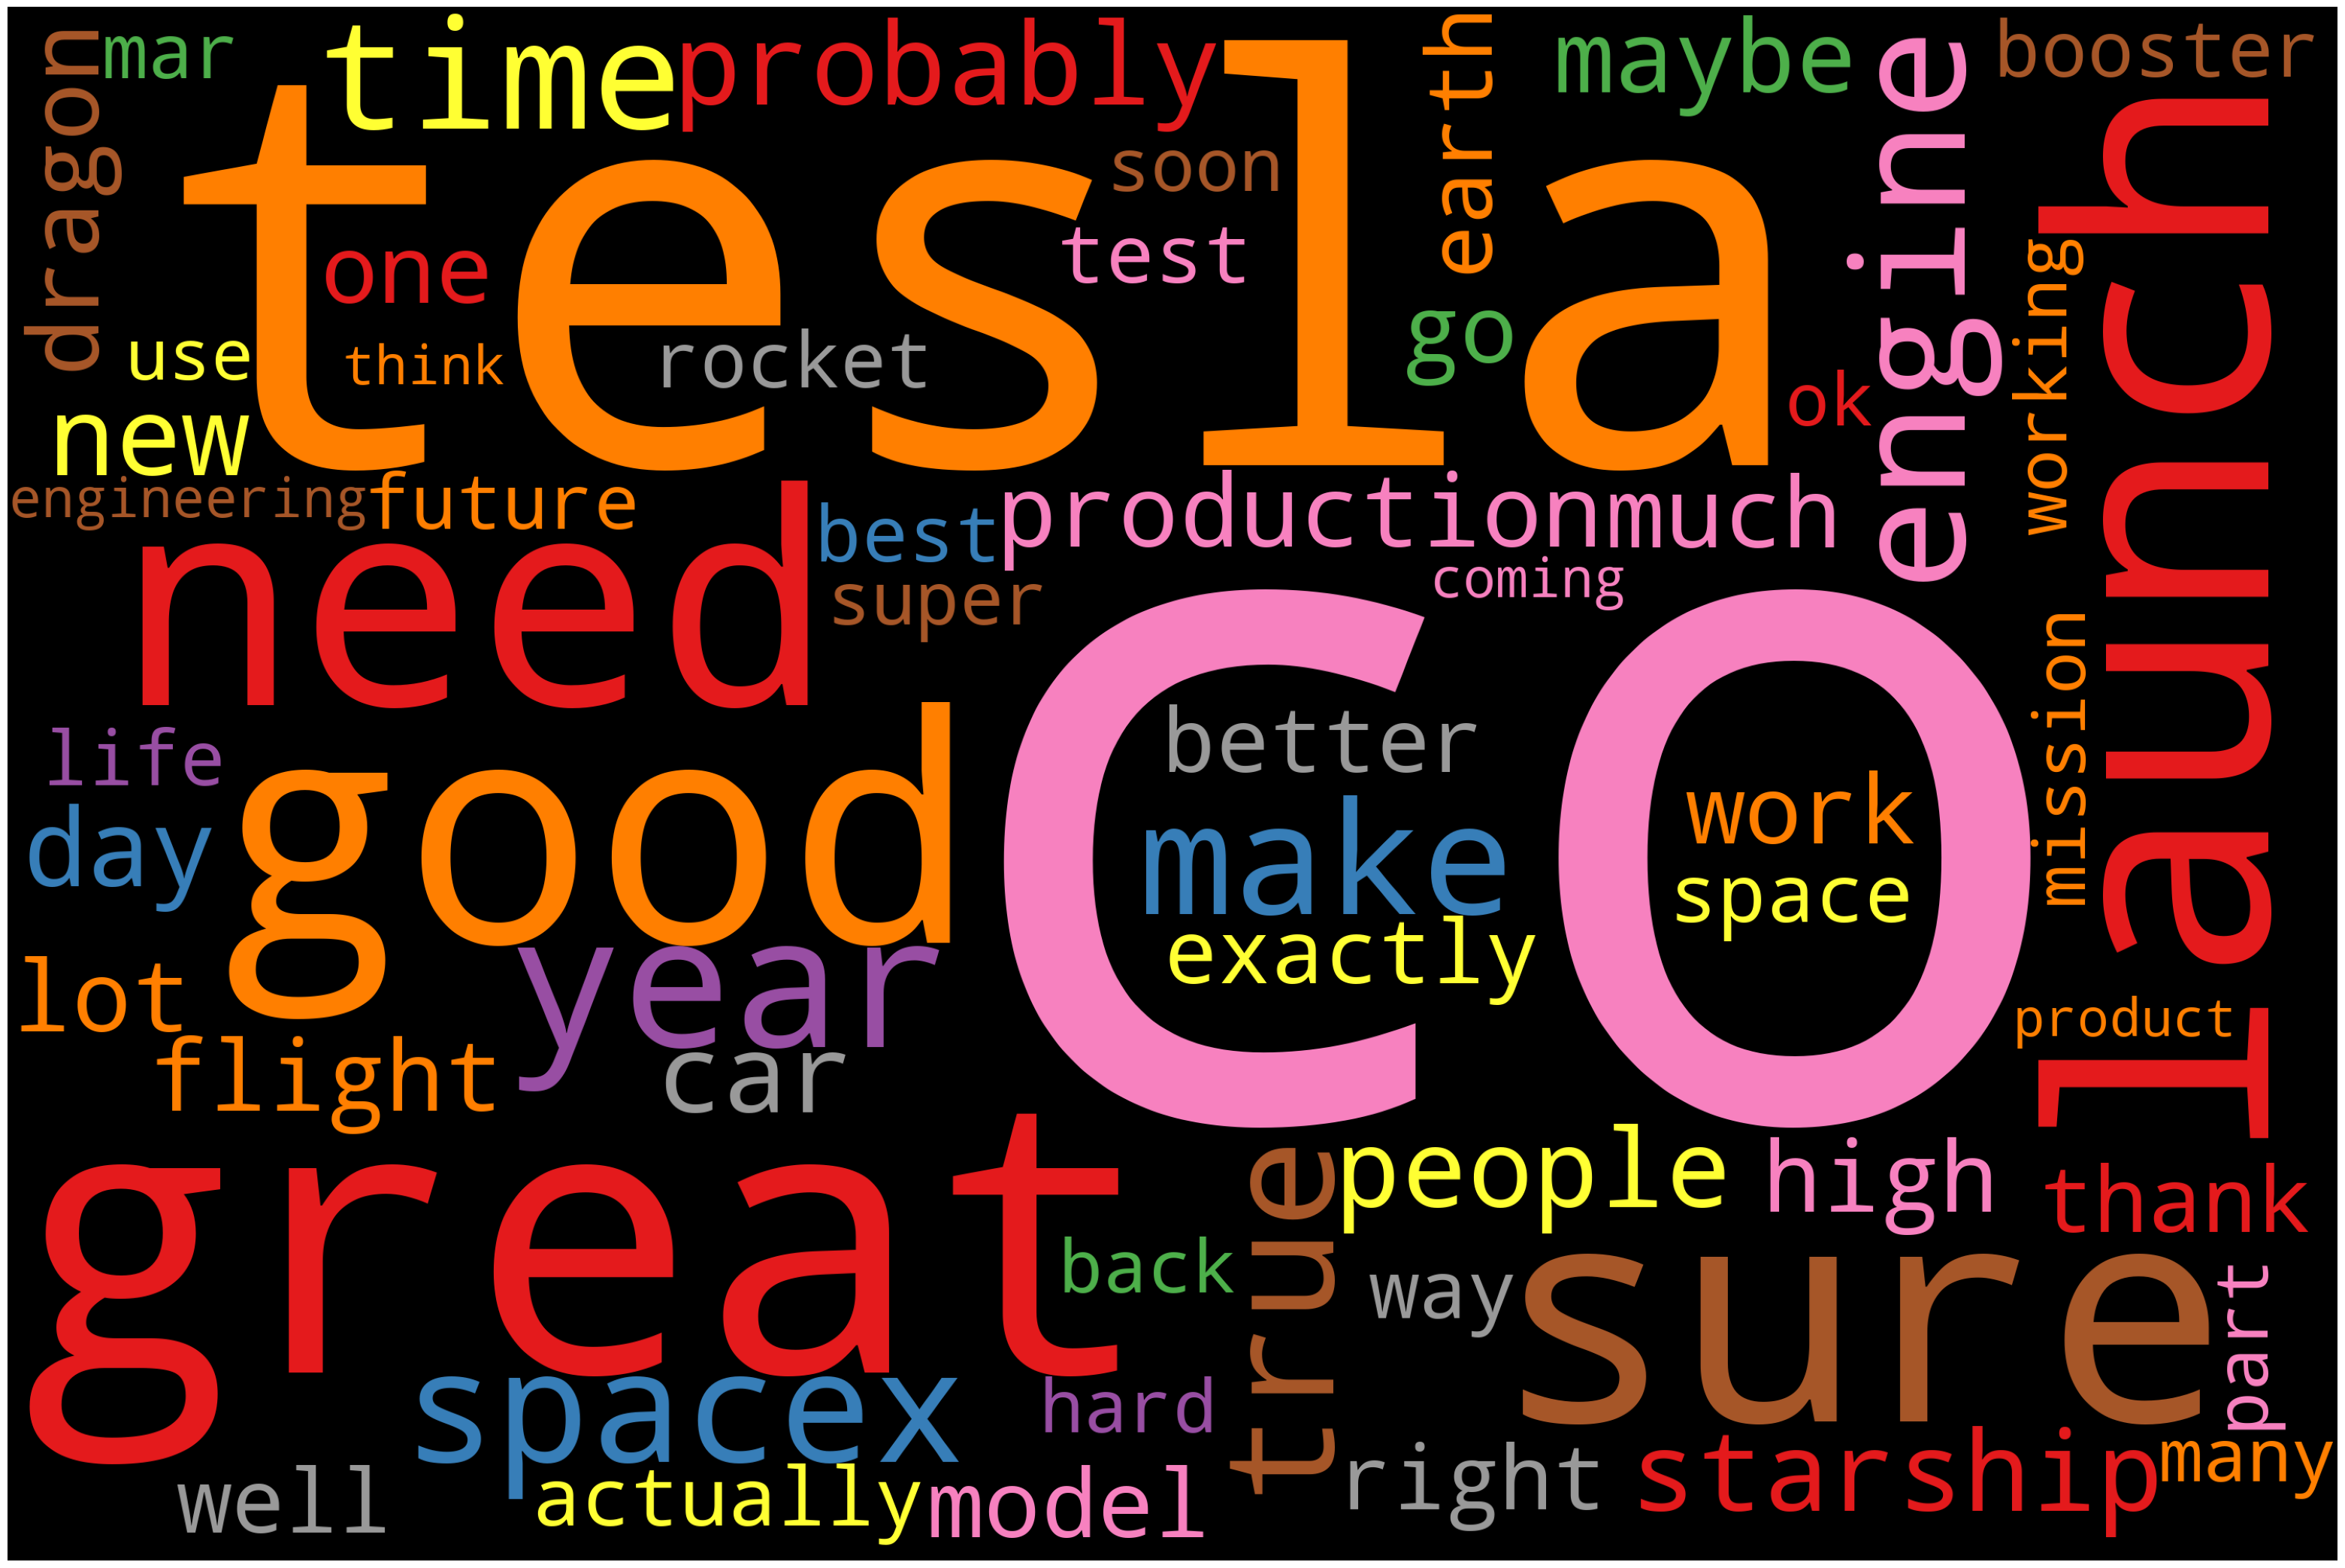

In [85]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud
STOPWORDS.add("ye")
STOPWORDS.add("even")
STOPWORDS.add("yes")
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=60,
                   colormap='Set1',stopwords=STOPWORDS).generate(joined_data)
plot_cloud(wordcloud)

## Sentiment Analysis

In [86]:
# !pip install afinn

In [87]:
from afinn import Afinn

In [88]:
af= Afinn(language='en', emoticons=False, word_boundary=True)

In [89]:
# user Defined function to measure affinty scores

def score_cal(texts):
    score13=[]
    for i in range(0, len(texts)):
        sent_score13= 0
        words13= texts[i].split()
        for i in range(0, len(words13)):
            af_score13= af.score(words13[i])
            sent_score13 += af_score13
        score13.append(sent_score13)
    return score13

In [90]:
score=score_cal(data)
score

[0.0,
 0.0,
 3.0,
 -1.0,
 6.0,
 3.0,
 -2.0,
 2.0,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 2.0,
 1.0,
 2.0,
 -1.0,
 -3.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -2.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 0.0,
 0.0,
 0.0,
 4.0,
 2.0,
 0.0,
 0.0,
 0.0,
 2.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 4.0,
 1.0,
 0.0,
 2.0,
 2.0,
 1.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 3.0,
 -1.0,
 1.0,
 -2.0,
 0.0,
 0.0,
 4.0,
 -3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 7.0,
 0.0,
 0.0,
 0.0,
 3.0,
 -1.0,
 4.0,
 0.0,
 3.0,
 2.0,
 -1.0,
 0.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 3.0,
 -3.0,
 0.0,
 6.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0,
 6.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -2.0,
 -2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 -2.0,
 0.0,
 0

In [93]:
sentiment_df= pd.DataFrame({"Tweets": data, "Sentiment_val": score })
sentiment_df.head()

,Tweets,Sentiment_val
0,alien,0.0
1,ray tracing cyberpunk hdr next level tried,0.0
2,great interview,3.0
3,doge underestimated,-1.0
4,congratulation tesla china amazing execution l...,6.0


In [94]:
sentiment_df[sentiment_df["Sentiment_val"]>0].sort_values(by= "Sentiment_val" , ascending=False).head(10)
Positive =sentiment_df[sentiment_df["Sentiment_val"]>0]
Positive

,Tweets,Sentiment_val
2,great interview,3.0
4,congratulation tesla china amazing execution l...,6.0
5,happy new year ox http co wfkmyu oj,3.0
7,thanks,2.0
9,entertaining outcome likely,2.0
...,...,...
1871,sure great terrifying everything ever sensed t...,3.0
1872,yes,1.0
1873,sorry hopefully soon,1.0
1878,make sure read ur term condition clicking accept,1.0


In [95]:
Positive["Sentiment_val"].mean()

2.5426997245179064

In [96]:
sentiment_df[sentiment_df["Sentiment_val"]<0].sort_values(by= "Sentiment_val" , ascending=True).head(10)
negative = sentiment_df[sentiment_df["Sentiment_val"]<0]
negative

,Tweets,Sentiment_val
3,doge underestimated,-1.0
6,frodo underdoge thought would fail http co zgx...,-2.0
15,definitely issue sentencing seems bit high,-2.0
19,crypto wallet give private key avoided cost,-1.0
20,app suck,-3.0
...,...,...
1862,earning power post augmentation would easily p...,-1.0
1874,actually payout vesting stock option may never...,-1.0
1875,easy way answer tweet helping dire brain injur...,-2.0
1877,true sound surreal negative propaganda still e...,-1.0


In [97]:
negative["Sentiment_val"].mean()

-2.045685279187817

<AxesSubplot:xlabel='Sentiment_val', ylabel='Count'>

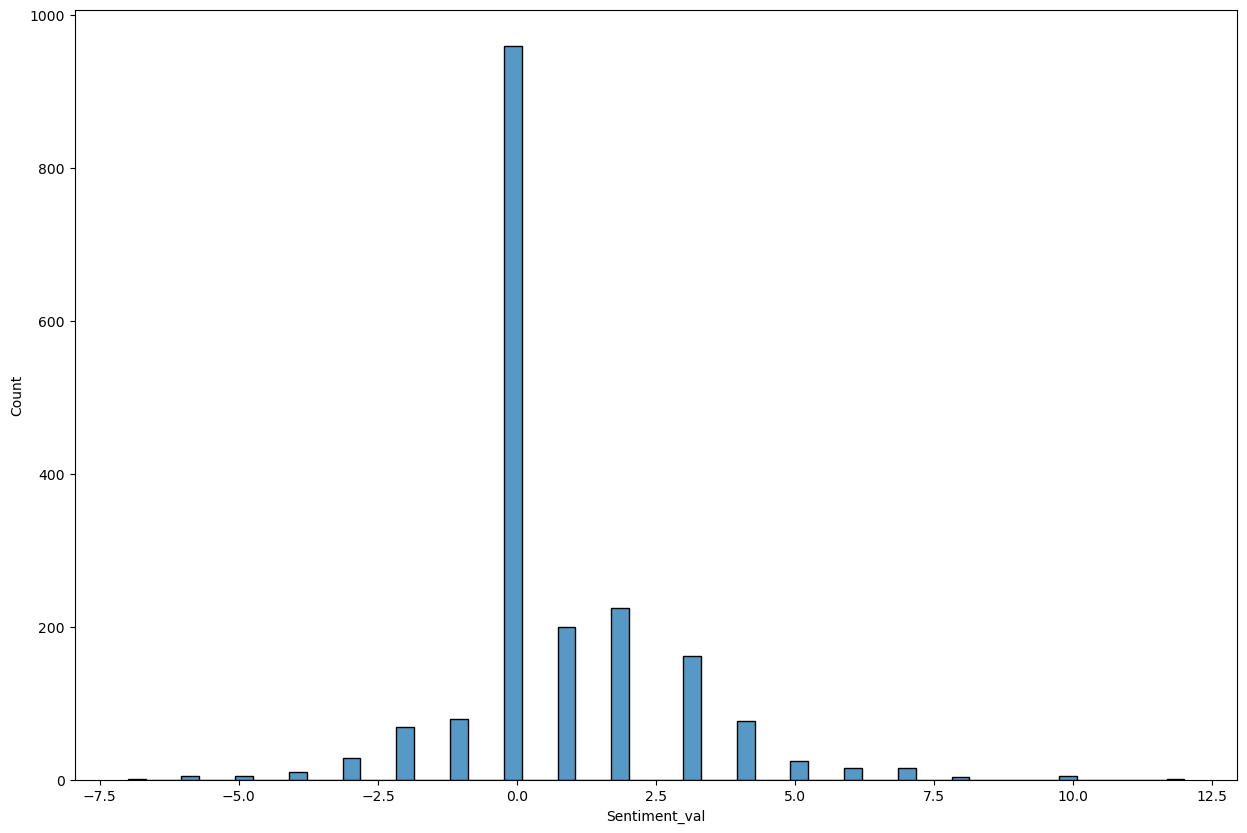

In [98]:
plt.figure(figsize=(15,10))
sns.histplot(sentiment_df["Sentiment_val"])

<AxesSubplot:ylabel='Sentiment_val'>

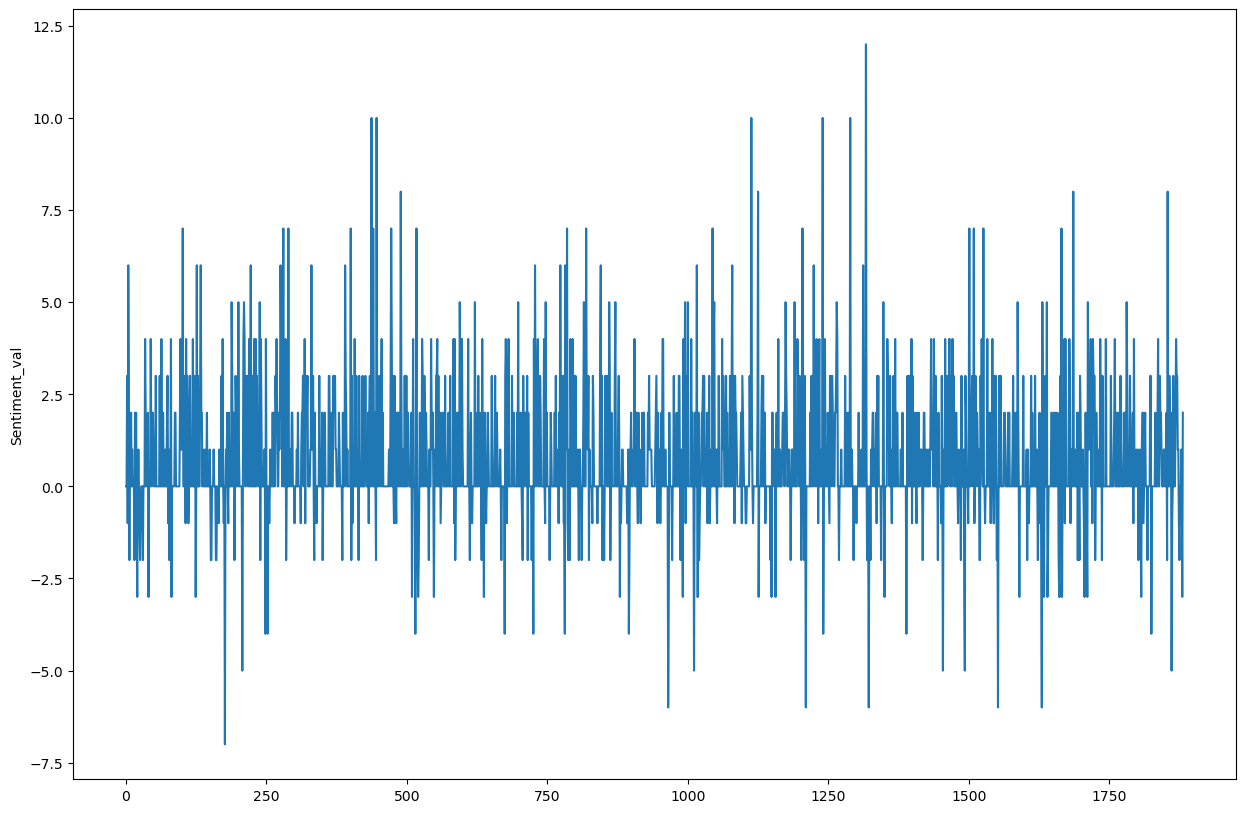

In [100]:
plt.figure(figsize=(15,10))
sns.lineplot(y="Sentiment_val",x=range(0,1882), data=sentiment_df)